<a href="https://colab.research.google.com/github/ramanakshay/Optimal-Transport/blob/main/notebooks/multi_marginal_ot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Marginal Optimal Transport

## Import Libraries

In [2]:
!pip install pot  # Pip Installs Packages

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 664 kB 9.6 MB/s 


In [3]:
user = 'ramanakshay'
repo = 'Optimal-Transport'

url = f"git+https://github.com/{user}/{repo}.git"
!pip install --upgrade {url}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ramanakshay/Optimal-Transport.git to /tmp/pip-req-build-nq0u1hq2
  Running command git clone -q https://github.com/ramanakshay/Optimal-Transport.git /tmp/pip-req-build-nq0u1hq2
  Created wheel for utils: filename=utils-0.1.0-py3-none-any.whl size=2956 sha256=7f37dd37374e15f52147d91ee7dc5db1fb72bf0336a6924108ca1b15ecd27b07
  Stored in directory: /tmp/pip-ephem-wheel-cache-tv3bk7g6/wheels/83/c1/b0/8b4aae55c1a6c852e5e98d2e522e0c76c069f92e4d3885455f
Successfully built utils


In [4]:
import numpy as np 

import matplotlib.pyplot as plt # plotting

import ot  # ot
import ot.plot
from prettytable import PrettyTable

import time # measure time
from numpy import random

In [5]:
from utils.plot import plot_matrix,plot_2d_map
from utils.dist import find_cost_matrix,find_cost_matrix_old

##Coulomb Cost

In [6]:
def gaussian_mix(n,mu,std,scale = None):
  assert len(mu) == len(std)
  if scale == None:
    scale = [1]*len(mu)
  x = np.arange(n, dtype = np.float64)
  h = 0
  for i in range(len(mu)):
    h += np.exp(-(x - mu[i]) ** 2 / (2 * std[i] ** 2))*scale[i]
  return h / h.sum()

In [7]:
def find_cost_tensor(n,X,p = 1):
  C = np.zeros((size,)*n)
  for i in range(n):
    for j in range(n):
      if i < j:
        shape = [1]*n
        shape[i] = shape[j] = size
        shape = tuple(shape)
        C += find_cost_matrix_old(X[i].reshape(size,1),X[j].reshape(size,1),1,dist=("coulomb",1)).reshape(shape)
  return C

In [8]:
def sinkhorn_old(A,C,epsilon,niter):
  n = A.shape[0]
  size = A.shape[1]

  u = np.ones((n,size))
  K = np.exp(-C/epsilon)

  for it in range(niter):
    for i in range(n):
      prod = np.copy(K)
      for j in range(n):
        if (j != i):
          shape = [1]*n
          shape[j] = size
          shape = tuple(shape)
          prod *= u[j].reshape(shape)

      axes = list(range(n))
      axes.remove(i)
      axes = tuple(axes)
      prod = np.sum(prod,axis = axes)
      u[i] = A[i] / prod
  
  P = np.copy(K)
  for i in range(n):
    shape = [1]*n
    shape[i] = size
    shape = tuple(shape)
    P *= u[i].reshape(shape)
  
  return P

In [28]:
def sinkhorn(A,C,epsilon,niter):
  n = A.shape[0]
  size = A.shape[1]
  u = np.ones((n,size))
  K = np.exp(-C/epsilon)

  P = np.copy(K)
  for it in range(niter):
    print(it)
    for i in range(n):
      shape = [1]*n
      shape[i] = size
      shape = tuple(shape)
      temp = u[i].reshape(shape)
      P = P / temp #remove u[i] from p

      axes = list(range(n))
      axes.remove(i)
      axes = tuple(axes)
      vec = np.sum(P,axis = axes)
      u[i] = A[i] / vec

      temp = u[i].reshape(shape)
      P = P * temp #multiply updated value
  
  return P

In [1]:
n = 3
size = 20

A = np.empty((n,size), float)
A[0] = gaussian_mix(size,[10,50],[5,15],[2,1])
A[1] = gaussian_mix(size,[15,60],[7,10],[1.5,1])
A[2] = gaussian_mix(size,[20,80],[10,5],[1,1])
A[3] = gaussian_mix(size,[15,60],[7,10],[1.5,1])

x = np.array([[i,] for i in range(size)]) # defining the space
X = np.tile(x.T,(n,1))

NameError: ignored

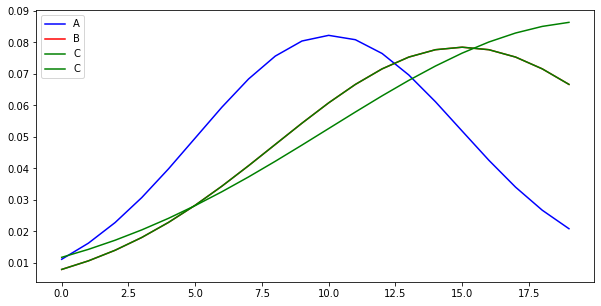

In [44]:
#Plot distributions
plt.figure(figsize=(10, 5))
plt.plot(x, A[0], 'b', label='A')
plt.plot(x, A[1], 'r', label='B')
plt.plot(x, A[2], 'g', label='C')
plt.plot(x, A[3], 'g', label='C')
plt.legend()
plt.show()

In [ ]:
C = find_cost_tensor(n,X)
print(C.shape)

In [39]:
P = sinkhorn(A,C,1,1000)
# Pxz = np.sum(P,axis = 0)
# ot.plot.plot1D_mat(A[1], A[2], Pxz, 'Transportation Matrix')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

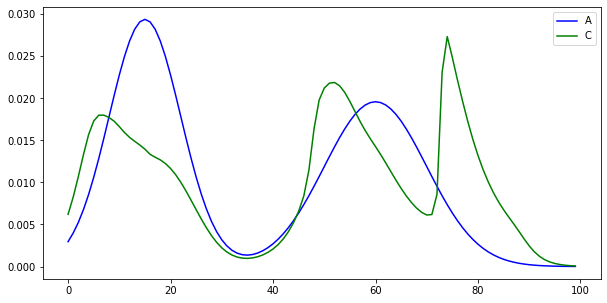

In [33]:
P0 = np.sum(P,axis = (0,3,2))
plt.figure(figsize=(10, 5))
plt.plot(x, A[1], 'b', label='A')
plt.plot(x, P0, 'g', label='C')
plt.legend()
plt.show()

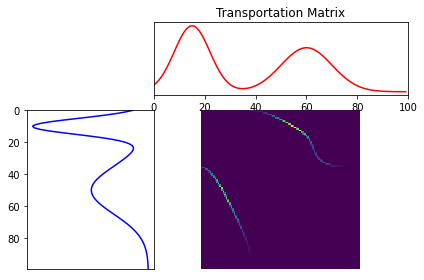

In [ ]:
Ce = find_cost_matrix(x,x,1,dist = ("coulomb",1))
Pe = ot.emd(A[0],A[1],Ce)
ot.plot.plot1D_mat(A[0], A[1], Pe, 'Transportation Matrix')